In [2]:
from math import *
import numpy as np

G_SI = 6.67408e-11      #Gravitational constant in (m^3 kg^-1 s^-2)
M = 1.98855e30          #Solar mass in kg
L = 149597870700        #AU in m
T = 365.256*24*3600     #Sidereal year in seconds
m_E = 5.972e24 / M      #Earth-mass in solar units
m_S = 1.98855e30 / M    #Solar mass: 1 in solar units
m_J = 1.898e27 / M      #Jupiter mass in solar units
day = 24*3600 / T       #A day in our chosen time unit, for convenience
G = G_SI*M*T**2/L**3    #G in in AU^3 solarmasses^-1 years^-2
c = 63239.7263          #Speed of light in AU/year
alfa = 0
beta = 0

#initial conditions-------------------------------------------------------------

rp_E = 0.9                                  #Perihelion for Earth
ra_E = 1.1                                  #Aphelion for Earth
a_E = (ra_E+rp_E)/2                         #Semi-major axis for Earth
init_E = sqrt(m_S*G*((2/ra_E)-(1/a_E)))     #Find the initial velocity at perihelion for Earth

rp_J = 4.9                                  #Perihelion for Jupiter
ra_J = 5.5                                  #Aphelion for Jupiter
a_J = (ra_J+rp_J)/2                         #Semi-major axis for Jupiter
init_J = sqrt(m_S*G*((2/ra_J)-(1/a_J)))     #Find the initial velocity at perihelion for Jupiter

Epos_0 = np.array([0,ra_E,0])               #Earths initial position
Evel_0 = np.array([init_E, 0, 0])           #Earths initial velocity
Jpos_0 = np.array([0,-ra_J,0])              #Jupiters initial position
Jvel_0 = np.array([-init_J, 0, 0])          #Jupiters initial velocity
Spos_0 = np.array([0,0,0])                  #Suns initial position
Svel_0 = np.array([0,0,0])                  #Suns initial velocity
#Create body class-------------------------------------------------------------
class Body:
    def __init__(self, pos, mass, vel):
        self.pos=pos
        self.mass=mass
        self.vel=vel
#Define bodies--------------------------------------------------------------------
SUN = Body(pos=Spos_0, mass=m_S, vel=Svel_0)
Earth = Body(pos=Epos_0, mass=m_E, vel=Evel_0)
Jupiter = Body(pos=Jpos_0, mass=m_J, vel=Jvel_0)
#Define Force function---------------------------------------------------------------
def Force(p1,p2):                                                                                   #Calculates acceleration due to gravitational forces on p1 and p2 (p1 is the particles acceleration)
    r_vec = p1.pos-p2.pos                                                                           #Looks for p1 and a value labeled pos in the definition of p1
    r_mag = np.linalg.norm(r_vec)                                                                   #Finds magnitude of r
    r_hat = r_vec/r_mag                                                                             #Calculates r_hat
    Lsqrd   = np.dot(np.cross(p1.pos,p1.vel),np.cross(p1.pos,p1.vel))                               #Finds the angular momentum and squares it for p1
    r_Lsqrd = Lsqrd/(c**2)                                                                          #Finds "the characteristic parameter" of p1
    r_s = (2*G*p2.mass)/c**2
    Force = (-(c**2)*r_s)/(2*r_mag**2)*(1+alfa*(r_s/r_mag)+beta*(r_Lsqrd/r_mag**2))*r_hat*p1.mass   # Finds the Force of p1
    return Force

dt = 1*day      #Timesteps
t = 0           #Start time
n = 12          #Time limit
count = 0
size = 1+int(n/dt)
Timestep=np.zeros(size)

Sun_pos=np.zeros((size,3))
Earth_pos=np.zeros((size,3))
Jupiter_pos=np.zeros((size,3))

Sun_vel=np.zeros((size,3))
Earth_vel=np.zeros((size,3))
Jupiter_vel=np.zeros((size,3))

Sun_Force=np.zeros((size,3))
Earth_Force=np.zeros((size,3))
Jupiter_Force=np.zeros((size,3))

while (t<n):
        Timestep[count]=t
        Sun_pos[count]=SUN.pos
        Earth_pos[count]=Earth.pos
        Jupiter_pos[count]=Jupiter.pos
        Sun_vel[count]=SUN.vel
        Earth_vel[count]=Earth.vel
        Jupiter_vel[count]=Jupiter.vel

        SUN.Force = Force(SUN,Earth)+Force(SUN,Jupiter)             #Finds acceleration on sun
        Earth.Force = Force(Earth,SUN)+Force(Earth,Jupiter)         #Finds acceleration on earth
        Jupiter.Force = Force(Jupiter,SUN)+Force(Jupiter,Earth)     #Finds acceleration on Jupiter

        Sun_Force[count]=SUN.Force
        Earth_Force[count]=Earth.Force
        Jupiter_Force[count]=Jupiter.Force

        SUN.vel = SUN.vel+(SUN.Force/SUN.mass)*dt                   #Finds next velocity for SUN
        Earth.vel = Earth.vel+(Earth.Force/Earth.mass)*dt           #Finds next velocity for Earth
        Jupiter.vel = Jupiter.vel+(Jupiter.Force/Jupiter.mass)*dt   #Finds next velocity for Jupiter
        
        SUN.pos = SUN.pos+SUN.vel*dt                                #Finds the next position for SUN
        Earth.pos = Earth.pos+Earth.vel*dt                          #Finds the next position for Earth
        Jupiter.pos = Jupiter.pos+Jupiter.vel*dt                    #Finds the next position for Jupiter

        t = t+dt                                                    #Goes to next time step
        count = count + 1
else:
    print('done')
        

#Saves arrays-----------------------------------------------------------------
#np.savetxt("Sun_pos.csv", Sun_pos, delimiter=",")
#np.savetxt("Earth_pos.csv", Earth_pos, delimiter=",")
#np.savetxt("Jupiter_pos.csv", Jupiter_pos, delimiter=",")

#np.savetxt("Sun_vel.csv", Sun_vel, delimiter=",")
#np.savetxt("Earth_vel.csv", Earth_vel, delimiter=",")
#np.savetxt("Jupiter_vel.csv", Jupiter_vel, delimiter=",")

#np.savetxt("Sun_Force.csv", Sun_Force, delimiter=",")
#np.savetxt("Earth_Force.csv", Earth_Force, delimiter=",")
#np.savetxt("Jupiter_Force.csv", Jupiter_Force, delimiter=",")

#makes vectors for easy plotting-----------------------------------------------------------------

# Save .npy files for SINDy --------------------------------------------------

#np.save("Sun_pos.npy", Sun_pos)
#np.save("Earth_pos.npy", Earth_pos)
#np.save("Jupiter_pos.npy", Jupiter_pos)

#np.save("Sun_vel.npy", Sun_vel)
#np.save("Earth_vel.npy", Earth_vel)
#np.save("Jupiter_vel.npy", Jupiter_vel)

#np.save("Sun_Force.npy", Sun_Force)
#np.save("Earth_Force.npy", Earth_Force)
#np.save("Jupiter_Force.npy", Jupiter_Force)


done


In [7]:
Sun_pos[:,0]

array([ 0.00000000e+00,  0.00000000e+00, -1.69464731e-12, ...,
       -2.91512643e-02, -2.91512846e-02, -2.91513056e-02])

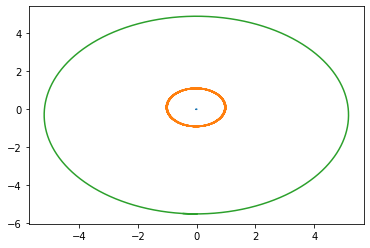

In [10]:
from matplotlib import pyplot as plt

plt.plot(Sun_pos[:,0], Sun_pos[:,1])
plt.plot(Earth_pos[:,0], Earth_pos[:,1])
plt.plot(Jupiter_pos[:,0], Jupiter_pos[:,1])